In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# For Prediction:
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler

# For nice Plots
%matplotlib inline
plt.style.use('default')

# Read in Data

In [2]:
dir_path = os.path.abspath("")
fname = dir_path+'\countrydf.csv'
countrydf = pd.read_csv(fname, encoding='latin-1')
countrydf = countrydf.loc[:, ~countrydf.columns.str.contains('^Unnamed')]
countrydf = countrydf.drop(["Country", "Year"],axis=1)

# Prediction:

In [3]:
# Build a test set and training set

cols_to_standardize = countrydf.columns.drop(['Future Undernourishment'])
scaler = StandardScaler()
countrydf[cols_to_standardize] = scaler.fit_transform(countrydf[cols_to_standardize])

# Print the standardized dataframe
print(countrydf)

X_train, X_test, y_train, y_test = train_test_split(
  countrydf.drop(["Future Undernourishment"], axis=1), countrydf["Future Undernourishment"], test_size=1/3, random_state = 42)

# Replace all the NaNs with the column mean, 
# and build the test set and training set using the indicies from the first set
countrydf2 = countrydf.fillna(countrydf.mean())
# Build a test set and training set
X_train2 = countrydf2.drop(["Future Undernourishment"], axis=1).iloc[X_train.index]
X_test2 = countrydf2.drop(["Future Undernourishment"], axis=1).iloc[X_test.index]
y_train2 = countrydf2["Future Undernourishment"].iloc[y_train.index]
y_test2 = countrydf2["Future Undernourishment"].iloc[y_test.index]

# Use only rows with non-NaN response variable, then replace all the NaNs with the column mean 
# and build the test set and training set using the indicies from the first set
keep_indices_test = np.where(y_test.notna())
keep_indices_train = np.where(y_train.notna())
# Build a test set and training set
X_train3 = X_train2.iloc[keep_indices_train]
X_test3 = X_test2.iloc[keep_indices_test]
y_train3 = y_train2.iloc[keep_indices_train]
y_test3 = y_test2.iloc[keep_indices_test]

      Average dietary energy supply adequacy (percent) (3-year average)  \
0                                              1.031639                   
1                                              1.169786                   
2                                              1.238859                   
3                                              1.238859                   
4                                              1.307932                   
...                                                 ...                   
1075                                           0.202758                   
1076                                           0.202758                   
1077                                           0.202758                   
1078                                           0.202758                   
1079                                                NaN                   

      Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day)

# ANN Plot

In [4]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    #plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

# ANN for Model 2

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.optimizers import Adam

def build_model2(n_hidden=1, n_neurons=60, learning_rate=1e-3, input_shape=X_train2.shape[1]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [6]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model2)

C:\Users\stvp2\AppData\Local\Temp\ipykernel_38324\3141062689.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model2)


In [7]:

tf.random.set_seed(42)
# define the input shape and number of classes
input_shape = X_train2.shape[1]
num_classes = 1

# define the model architecture
model = keras.Sequential()
model.add(layers.Dense(70, activation='relu', input_shape=(input_shape,)))
for i in range(3):
    model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dense(num_classes, activation='linear'))

optimizer = Adam(learning_rate=0.001)
# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)
#print(model.summary())
print(input_shape)

# train the model
history2 = model.fit(X_train2, y_train2, epochs=160, validation_data=(X_test2, y_test2))

66
Epoch 1/160
23/23 [==============================] - 1s 7ms/step - loss: 2.0847 - val_loss: 1.5143
Epoch 2/160
23/23 [==============================] - 0s 2ms/step - loss: 1.8691 - val_loss: 1.4258
Epoch 3/160
23/23 [==============================] - 0s 2ms/step - loss: 1.6970 - val_loss: 1.3678
Epoch 4/160
23/23 [==============================] - 0s 2ms/step - loss: 1.5187 - val_loss: 1.3524
Epoch 5/160
23/23 [==============================] - 0s 2ms/step - loss: 1.3542 - val_loss: 1.3250
Epoch 6/160
23/23 [==============================] - 0s 2ms/step - loss: 1.1899 - val_loss: 1.3031
Epoch 7/160
23/23 [==============================] - 0s 2ms/step - loss: 1.1100 - val_loss: 1.2670
Epoch 8/160
23/23 [==============================] - 0s 2ms/step - loss: 1.0513 - val_loss: 1.4066
Epoch 9/160
23/23 [==============================] - 0s 2ms/step - loss: 0.9325 - val_loss: 1.2920
Epoch 10/160
23/23 [==============================] - 0s 2ms/step - loss: 0.8946 - val_loss: 1.2528
Epoch 

[2.08471941947937, 1.8690911531448364, 1.697014331817627, 1.5186933279037476, 1.354235291481018, 1.189934253692627, 1.109982967376709, 1.0513075590133667, 0.9325456619262695, 0.8945663571357727, 0.8391664028167725, 0.7714693546295166, 0.6790159344673157, 0.6098228693008423, 0.5880258083343506, 0.5749223828315735, 0.5489974617958069, 0.5306382179260254, 0.42679986357688904, 0.4345107674598694, 0.46403491497039795, 0.5022796392440796, 0.39706167578697205, 0.3761407136917114, 0.35889366269111633, 0.339336097240448, 0.34615519642829895, 0.32754963636398315, 0.3370179235935211, 0.2718764543533325, 0.2777446508407593, 0.311638206243515, 0.3214733898639679, 0.28283068537712097, 0.25337955355644226, 0.28678828477859497, 0.25013846158981323, 0.2292456328868866, 0.2345980703830719, 0.21314169466495514, 0.20852775871753693, 0.20121151208877563, 0.25359246134757996, 0.22664031386375427, 0.22518499195575714, 0.24251902103424072, 0.20915722846984863, 0.1916077882051468, 0.16172407567501068, 0.167090

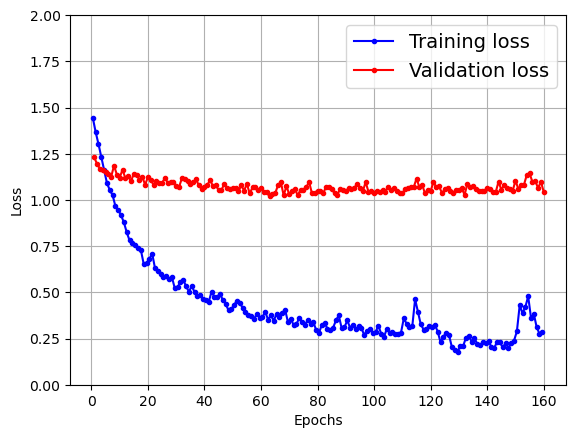

In [8]:
print(history2.history["loss"])
plot_learning_curves(np.sqrt(history2.history["loss"]), np.sqrt(history2.history["val_loss"]))
plt.ylim(0,2)
plt.show()
#plt.savefig("deepfoodsecurity.png")

In [9]:
import skopt


param_distribs = {
    "n_hidden": [2,3, 4, 5, 6],
    "n_neurons": np.arange(10,100),
    "learning_rate": np.arange(0.0001, 0.003, 0.001),
}

bayes_search_cv = skopt.BayesSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
bayes_search_cv.fit(X_train2, y_train2, epochs=300,
                  validation_data=(X_test2, y_test2),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Epoch 1/300
15/15 [==============================] - 1s 10ms/step - loss: 2.0890 - val_loss: 1.5904
Epoch 2/300
15/15 [==============================] - 0s 3ms/step - loss: 2.0725 - val_loss: 1.5799
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 2.0606 - val_loss: 1.5701
Epoch 4/300
15/15 [==============================] - 0s 3ms/step - loss: 2.0483 - val_loss: 1.5619
Epoch 5/300
15/15 [==============================] - 0s 3ms/step - loss: 2.0392 - val_loss: 1.5538
Epoch 6/300
15/15 [==============================] - 0s 3ms/step - loss: 2.0274 - val_loss: 1.5476
Epoch 7/300
15/15 [==============================] - 0s 3ms/step - loss: 2.0192 - val_loss: 1.5388
Epoch 8/300
15/15 [==============================] - 0s 3ms/step - loss: 2.0083 - val_loss: 1.5335
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 1.9991 - val_loss: 1.5283
Epoch 10/300
15/15 [=============================

BayesSearchCV(cv=3,
              estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000002C86F5F6370>,
              n_iter=10,
              search_spaces={'learning_rate': array([0.0001, 0.0011, 0.0021]),
                             'n_hidden': [2, 3, 4, 5, 6],
                             'n_neurons': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])},
              verbose=2)

In [10]:
bayes_search_cv.best_params_

OrderedDict([('learning_rate', 0.0011), ('n_hidden', 5), ('n_neurons', 63)])

In [11]:
bayes_search_cv.best_score_

-1.354098876317342

In [12]:
bayes_search_cv.score(X_test2, y_test2)

12/12 [==============================] - 0s 744us/step - loss: 1.0954


-1.0954310894012451

In [13]:
model = bayes_search_cv.best_estimator_.model
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_149 (Dense)           (None, 63)                4221      
                                                                 
 dense_150 (Dense)           (None, 63)                4032      
                                                                 
 dense_151 (Dense)           (None, 63)                4032      
                                                                 
 dense_152 (Dense)           (None, 63)                4032      
                                                                 
 dense_153 (Dense)           (None, 63)                4032      
                                                                 
 dense_154 (Dense)           (None, 1)                 64        
                                                                 
Total params: 20,413
Trainable params: 20,413
Non-tra

In [14]:
model.evaluate(X_test2, y_test2)

12/12 [==============================] - 0s 839us/step - loss: 1.0954


1.0954310894012451

In [30]:
import numpy as np
np.sqrt(1.0954)

1.0466135867644752

# ANN for Model 3

In [16]:
def build_model3(n_hidden=1, n_neurons=60, learning_rate=1e-3, input_shape=X_train3.shape[1]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [17]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model3)

C:\Users\stvp2\AppData\Local\Temp\ipykernel_38324\1370646454.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model3)


In [18]:
tf.random.set_seed(42)
# define the input shape and number of classes
input_shape = X_train3.shape[1]
num_classes = 1

# define the model architecture
model = keras.Sequential()
model.add(layers.Dense(70, activation='relu', input_shape=(input_shape,)))
for i in range(3):
    model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dense(num_classes, activation='linear'))

optimizer = Adam(learning_rate=0.001)
# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)
#print(model.summary())
print(input_shape)

# train the model
history = model.fit(X_train3, y_train3, epochs=160, validation_data=(X_test3, y_test3))


66
Epoch 1/160
18/18 [==============================] - 0s 7ms/step - loss: 2.5366 - val_loss: 1.9317
Epoch 2/160
18/18 [==============================] - 0s 2ms/step - loss: 2.2516 - val_loss: 1.8687
Epoch 3/160
18/18 [==============================] - 0s 2ms/step - loss: 2.0308 - val_loss: 1.8047
Epoch 4/160
18/18 [==============================] - 0s 2ms/step - loss: 1.8680 - val_loss: 1.9452
Epoch 5/160
18/18 [==============================] - 0s 2ms/step - loss: 1.7828 - val_loss: 1.7182
Epoch 6/160
18/18 [==============================] - 0s 2ms/step - loss: 1.4785 - val_loss: 1.6289
Epoch 7/160
18/18 [==============================] - 0s 2ms/step - loss: 1.3310 - val_loss: 1.6994
Epoch 8/160
18/18 [==============================] - 0s 2ms/step - loss: 1.1659 - val_loss: 1.5672
Epoch 9/160
18/18 [==============================] - 0s 2ms/step - loss: 1.0813 - val_loss: 1.5741
Epoch 10/160
18/18 [==============================] - 0s 2ms/step - loss: 0.9668 - val_loss: 1.6709
Epoch 

[2.536648988723755, 2.2515628337860107, 2.0307998657226562, 1.868023157119751, 1.7828117609024048, 1.4784653186798096, 1.331016182899475, 1.1659215688705444, 1.0813229084014893, 0.9667714834213257, 0.9095911979675293, 0.8873499035835266, 0.8039260506629944, 0.7270190715789795, 0.6828060746192932, 0.6590933799743652, 0.7158951759338379, 0.6242271661758423, 0.6103334426879883, 0.5764213800430298, 0.5098221898078918, 0.49427950382232666, 0.49062833189964294, 0.5085828900337219, 0.49862149357795715, 0.45044395327568054, 0.4215429127216339, 0.40192827582359314, 0.41434812545776367, 0.3771483600139618, 0.4498596787452698, 0.3820241689682007, 0.33633166551589966, 0.3622523844242096, 0.33228811621665955, 0.3420710563659668, 0.2838175594806671, 0.2829543352127075, 0.2760413587093353, 0.27880245447158813, 0.29235512018203735, 0.278666615486145, 0.3252376616001129, 0.2699697017669678, 0.24939924478530884, 0.23859575390815735, 0.28770574927330017, 0.2506428360939026, 0.20861001312732697, 0.2564268

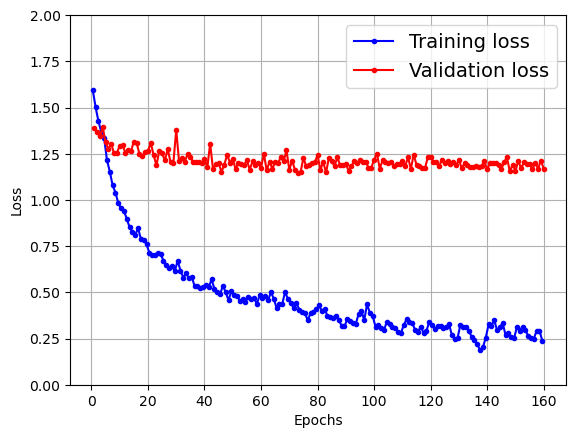

In [19]:
print(history.history["loss"])
plot_learning_curves(np.sqrt(history.history["loss"]), np.sqrt(history.history["val_loss"]))
plt.ylim(0,2)
plt.show()
#plt.savefig("deepfoodsecurity.png")

In [20]:
import skopt


param_distribs = {
    "n_hidden": [2,3, 4, 5, 6],
    "n_neurons": np.arange(10,100),
    "learning_rate": np.arange(0.0001, 0.003, 0.001),
}

bayes_search_cv = skopt.BayesSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
bayes_search_cv.fit(X_train3, y_train3, epochs=300,
                  validation_data=(X_test3, y_test3),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Epoch 1/300
12/12 [==============================] - 1s 11ms/step - loss: 2.7014 - val_loss: 1.9448
Epoch 2/300
12/12 [==============================] - 0s 3ms/step - loss: 2.3284 - val_loss: 1.8901
Epoch 3/300
12/12 [==============================] - 0s 3ms/step - loss: 2.0384 - val_loss: 1.7946
Epoch 4/300
12/12 [==============================] - 0s 3ms/step - loss: 1.7057 - val_loss: 1.7734
Epoch 5/300
12/12 [==============================] - 0s 3ms/step - loss: 1.4417 - val_loss: 1.7783
Epoch 6/300
12/12 [==============================] - 0s 3ms/step - loss: 1.4250 - val_loss: 1.8090
Epoch 7/300
12/12 [==============================] - 0s 3ms/step - loss: 1.1757 - val_loss: 1.8508
Epoch 8/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0314 - val_loss: 1.7119
Epoch 9/300
12/12 [==============================] - 0s 3ms/step - loss: 0.9091 - val_loss: 2.0965
Epoch 10/300
12/12 [=============================

BayesSearchCV(cv=3,
              estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000002C87FD6A5E0>,
              n_iter=10,
              search_spaces={'learning_rate': array([0.0001, 0.0011, 0.0021]),
                             'n_hidden': [2, 3, 4, 5, 6],
                             'n_neurons': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])},
              verbose=2)

In [21]:
bayes_search_cv.best_params_

OrderedDict([('learning_rate', 0.0021), ('n_hidden', 4), ('n_neurons', 77)])

In [22]:
bayes_search_cv.best_score_

-1.7640119791030884

In [23]:
bayes_search_cv.score(X_test3, y_test3)

9/9 [==============================] - 0s 868us/step - loss: 1.8573


-1.8573025465011597

In [24]:
model = bayes_search_cv.best_estimator_.model
model.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_313 (Dense)           (None, 77)                5159      
                                                                 
 dense_314 (Dense)           (None, 77)                6006      
                                                                 
 dense_315 (Dense)           (None, 77)                6006      
                                                                 
 dense_316 (Dense)           (None, 77)                6006      
                                                                 
 dense_317 (Dense)           (None, 1)                 78        
                                                                 
Total params: 23,255
Trainable params: 23,255
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.evaluate(X_test3, y_test3)

9/9 [==============================] - 0s 844us/step - loss: 1.8573


1.8573025465011597

In [31]:
np.sqrt(1.857)

1.3627178724886526